# Packages

In [2]:
# Diagnostic & memory management
import time # for performance checks
import datetime # for log
from datetime import timedelta
import psutil # for memory checks
from psutil._common import bytes2human
import gc # garbage collector - clean up memory

# Data analysis
import pandas as pd
import geopandas as gpd
import numpy as np

# Raster processing
import rasterio as rio

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data paths

In [3]:
# General Paths
preppedDat_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/data/prepped_data/'
rawDat_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/data/raw/'
output_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/output/'
interimFiles_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/output/intermediate_files/'
workFiles_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/work files/'

In [4]:
AOI_path = preppedDat_path+'Study_area_basedOn_UK_BFC_EPSG27700.gpkg' # Study area

# From SDS2 CW2  
Could be used for dual-axis plot of land impact VS energy prod

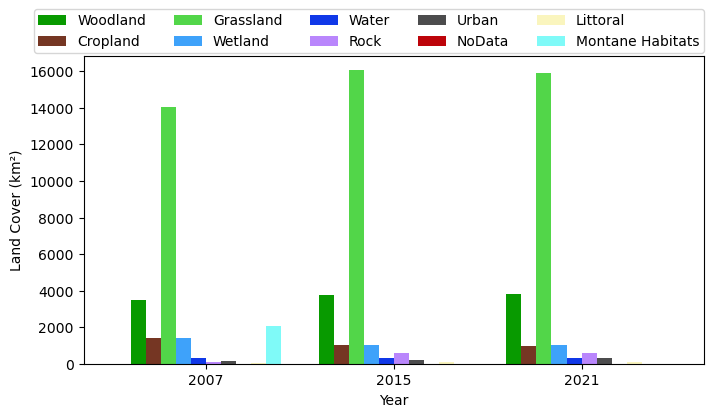

In [9]:
# Total cover plot
fig,ax=plt.subplots(figsize=(8,4))
zs_tot.loc[zs_tot['NPARK21NM']=='TOTAL','Year':].plot.bar(ax=ax, x='Year', width=0.8, color=('#089a00','#753623','#52d649','#3ea2fa','#1038e8','#b986fc','#4c4c4d','#bd040a','#faf5be','#7ffaf8'))
plt.legend(bbox_to_anchor=(0.46, 1.08), loc='center', borderpad=0.3, ncol=5)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Land Cover (km²)')
plt.savefig('images/total_landcover_per_class.png',dpi=300, bbox_inches='tight')
plt.show()

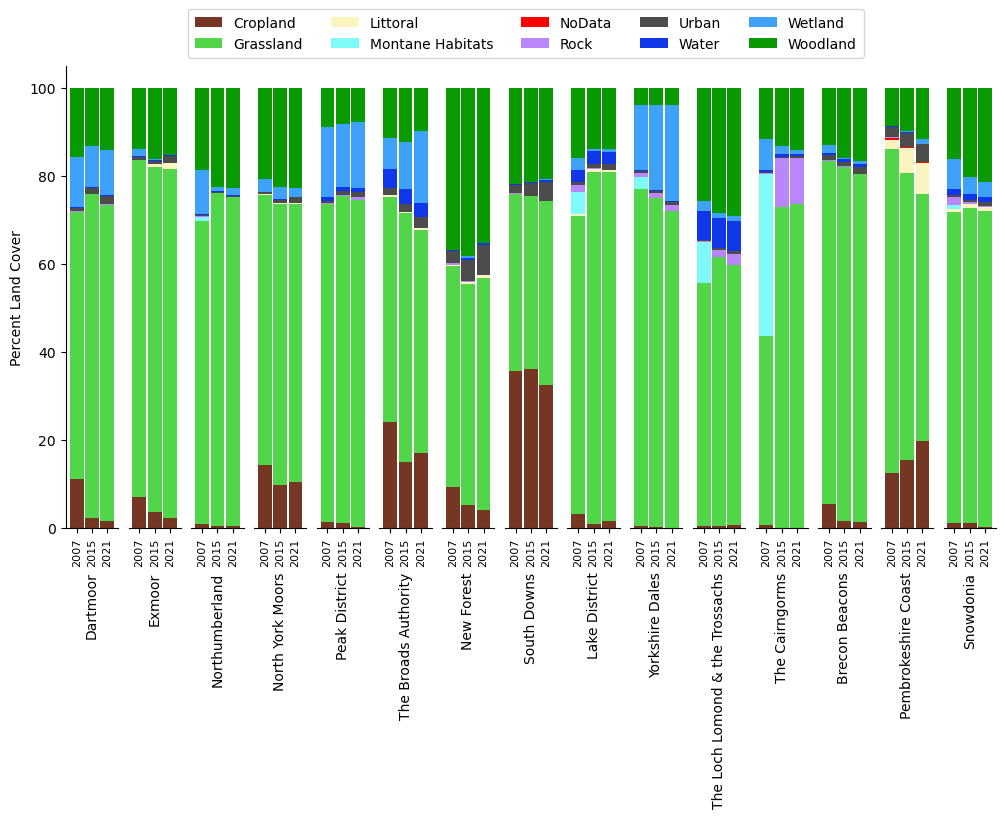

In [74]:
# Better visual display by using many plots at park level
fig, ax = plt.subplots(1,15,figsize = (12,6))
for i,j in zip(melted['Park short name'].unique(),range(len(melted['Park short name'].unique()))):
    sub = melted[melted['Park short name']==i]
    sub.rename(columns={'Year':i}, inplace=True)
    sub= sub.set_index([i,'Cover']).Percent
    sub.unstack().plot(ax=ax[j], kind='bar', stacked=True, width=0.9, legend=False,
                        color=('#753623','#52d649','#faf5be','#7ffaf8','red','#b986fc','#4c4c4d','#1038e8','#3ea2fa','#089a00'))
    #plt.xlabel(ax[j].get_xlabel(), rotation=90)
    ax[j].set_xlabel(ax[j].get_xlabel(), rotation=90)
    ax[j].tick_params(axis='x',labelsize=8)
    if j==0:
        ax[j].spines[['right', 'top']].set_visible(False)
        ax[j].set_ylabel('Percent Land Cover')
    else:
        ax[j].spines[['left','right', 'top']].set_visible(False)
        ax[j].get_yaxis().set_visible(False)

plt.legend(bbox_to_anchor=(-8, 1.07), loc='center', borderpad=0.5, ncol=5)
plt.savefig('images/landcover_percent.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Energy output

## Prepare energy df with only required scenarii, renamed

In [5]:
# Energy df
ener_df = pd.read_excel(f'{output_path}stats/Comparison Energy scenarii.xlsx')
ener_df.set_index('Scenario', inplace = True)

In [7]:
# ener_df = ener_df.drop(index=['S2','S2 thr'])
ener_df = ener_df.rename(index={'S8':'S2', 'S5':'S4','S6':'S5', 'S7':'S6', 'S8 thr':'S2 thr', 'S5 thr':'S4 thr','S6 thr':'S5 thr', 'S7 thr':'S6 thr'})
ener_df

,Unnamed: 0,Solar area (km²),Solar area (% of GB),"Solar Annual production, solar only (TWh) (PVOUT)","Solar Energy density, solar only (GWh/km²) (PVOUT)","Solar Annual production, solar only (TWh) (equation)","Solar Energy density, solar only (GWh/km²) (equation)","Solar Capacity, solar only (GW)","Solar Capacity density, solar only (MW/km²)",Wind area (km²),...,Total footprint (% of GB) co-location (Denholm footprint),"Total Solar Production, co-location (TWh) (PVOUT)","Total Solar Production, co-location (TWh) (equation)","Total Solar Capacity, co-location (GW)","Total Wind Capacity, co-location (GW)","Total Wind Production, co-location (TWh)","Total Solar Production, NO co-location (TWh) (PVOUT)","Total Wind Production, NO co-location (TWh)","Total Production, co-location (TWh)","Total Production, NO co-location (TWh)"
Scenario,,,,,,,,,,,,,,,,,,,,,
S1,0,354.5168,0.154043,18.077757,50.992667,39.669618,111.897711,17.725840,50.0,94.9936,...,0.155012,18.088446,39.693060,17.736866,0.503283,1.948935,18.088661,1.943453,20.037381,20.032114
S1 thr,S1,340.2999,0.147865,17.354713,50.998291,38.079609,111.900146,17.014995,50.0,82.3409,...,0.148718,17.365310,38.102849,17.025927,0.436922,1.693668,17.365524,1.688234,19.058979,19.053757
S3,0,29906.2192,12.994681,1465.419249,49.000485,3196.161885,106.872817,1495.310960,50.0,1126.4017,...,13.114797,1476.872957,3220.911108,1507.834822,7.235156,27.849408,1477.094473,22.687190,1504.722365,1499.781663
S2 thr,S2,31547.5383,13.707858,1548.294329,49.078135,3378.143417,107.081047,1577.376915,50.0,10434.0720,...,15.974585,1784.665486,3892.247949,1825.132920,78.887403,304.936684,1789.049868,214.043299,2089.602171,2003.093167
S4,0,2305.2699,1.001673,116.936744,50.725836,257.149290,111.548453,115.263495,50.0,10934.3352,...,1.313349,141.864390,311.935401,140.359750,55.237072,208.472324,142.331106,198.723580,350.336714,341.054686
S3 thr,S3,29395.6756,12.772843,1440.643212,49.008678,3141.864333,106.881855,1469.783780,50.0,1098.8128,...,12.888110,1451.621301,3165.581649,1481.782852,7.038484,27.097799,1451.833629,22.151697,1478.719100,1473.985326
S5,0,2305.2699,1.001673,116.936744,50.725836,257.149290,111.548453,115.263495,50.0,3544.3517,...,1.252827,141.864371,311.935330,140.359700,20.415805,76.925251,142.331139,67.174488,218.789622,209.505627
S4 thr,S4,2189.1591,0.951221,111.056709,50.730305,244.192866,111.546423,109.457955,50.0,10688.8109,...,1.252923,135.081717,296.990057,133.647942,53.980580,203.836428,135.531754,194.423814,338.918146,329.955568
S6,0,2707.8273,1.176590,136.166947,50.286422,299.236888,110.508114,135.391365,50.0,8711.4953,...,1.530932,167.771141,368.666885,167.558465,44.836171,168.317842,168.364767,155.813107,336.088983,324.177874


## Basic plot

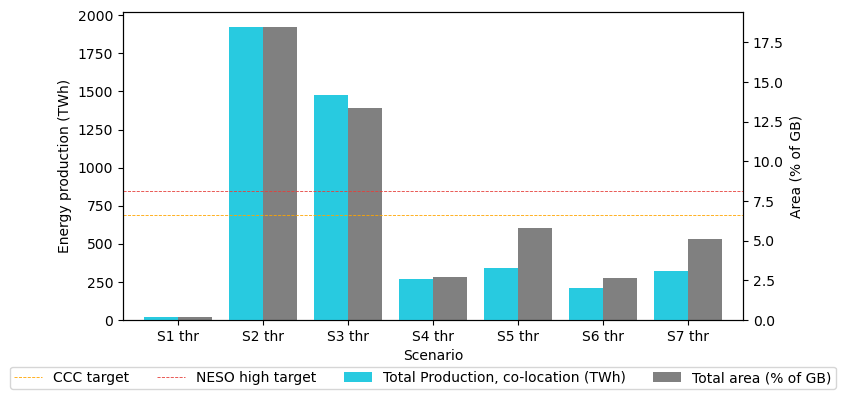

In [65]:
# Basic plot of totals
# Select columns to plot
cols_leftY = []
for i in range(1,8):
    cols_leftY.append(f'S{i} thr')
cols_leftY
cols_rightY = []
for i in range(1,8):
    cols_rightY.append(f'S{i} thr')
cols_rightY

# Plot
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
ener_df.loc[cols_leftY,'Total Production, co-location (TWh)'].plot.bar(ax=ax1, width=0.4, position = 1, color = '#28cae0')
ener_df.loc[cols_rightY,'Total area (% of GB)'].plot.bar(ax=ax, width=0.4, position = 0, color = 'grey')
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.axhline(y=692, color = 'orange', linewidth = 0.6, linestyle = '--', label = 'CCC target') # Add target info
ax1.axhline(y=845, color = '#e53f3a', linewidth = 0.6, linestyle = '--', label = 'NESO high target') # Add target info
# Get labels to be able to order manually in legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
handles = handles2 + handles1
labels = labels2 + labels1
fig.legend(handles, labels, loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.08))
# Axes labels
ax1.set_ylabel(f'Energy production (TWh)')
ax.set_ylabel('Area (% of GB)')
ax.set_xlim(left=-0.65)

# Save
plt.savefig(f'{workFiles_path}media/charts/Energy output.png',dpi=300, bbox_inches='tight')

plt.show()

## Stacked bar plot

In [10]:
ener_df.loc[rows,'Total area (% of GB)']

Scenario
S1 thr     0.183739
S2 thr    20.412724
S3 thr    13.355523
S4 thr     5.807678
S5 thr     2.637176
S6 thr     5.084430
Name: Total area (% of GB), dtype: float64

In [ ]:
# Stacked bar plot
# Select rows to plot
rows = []
for i in range(1,int(len(ener_df)/2)+1):
    rows.append(f'S{i} thr')
# Small bars parameters
small_bars_width = 0.01
small_bars_spacing = 0.25
small_bars_N = 1

# Energy Parameters to plot on the stacked left axis
ener_plot = ['Total Solar Production, co-location (TWh) (PVOUT)', 'Total Wind Production, co-location (TWh)']

# Plot
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
# Left Y bars
ener_df.loc[rows, ener_plot].plot.bar(ax=ax1, width=0.4, position = 1, stacked=True, color = ['#ffd93c','#28cae0'], legend=False)
# Right Y bars
ener_df.loc[rows,'Total footprint (% of GB) co-location (Denholm footprint)'].plot.bar(ax=ax, width=0.4, position = 0, color = 'grey')
# Right Y thin bars
# Code to space out bars from 
# https://stackoverflow.com/questions/66913686/how-to-get-spacing-between-grouped-bar-plot
ind = np.arange(len(ener_df)/2) # index / x-axis value # number here is number of bar groups
width = small_bars_width # width of each bar
DistBetweenBars = small_bars_spacing # distance between bars
Num = small_bars_N # number of bars in a group
# calculate the width of the grouped bars (including the distance between the individual bars)
WithGroupedBars = Num*width + (Num-1)*DistBetweenBars
data = ener_df.loc[rows,'Total area (% of GB)']
for i,j in zip(range(Num), data):
    ax.bar(ind-WithGroupedBars/2 + (width+DistBetweenBars)*i,data[j], width, color = 'black', position = 0)
    
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.axhline(y=692, color = 'orange', linewidth = 0.6, linestyle = '--') # Add target info
ax1.text(x=4, y=692 +20, color = 'orange', s='CCC target', fontsize = 10)
ax1.axhline(y=845, color = '#e53f3a', linewidth = 0.6, linestyle = '--') # Add target info
ax1.text(x=4, y=845 +20, color = '#e53f3a', s='NESO high target',  fontsize = 10)
# Get labels to be able to order manually in legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
handles = handles2 + handles1
labels = ['Annual Solar energy production (TWh)', 'Annual Wind energy production (TWh)'] + labels1
fig.legend(handles, labels, loc='lower center', borderpad=0.3, ncol=2, bbox_to_anchor=(0.5, -0.14))
# Axes labels
ax1.set_ylabel(f'Energy production (TWh)')
ax.set_ylabel('Area (% of GB)')
ax.set_xlim(left=-0.65)

# Save
#plt.savefig(f'{workFiles_path}media/charts/Energy output.png',dpi=300, bbox_inches='tight')

plt.show()

## Stacked bar + thin bars combo

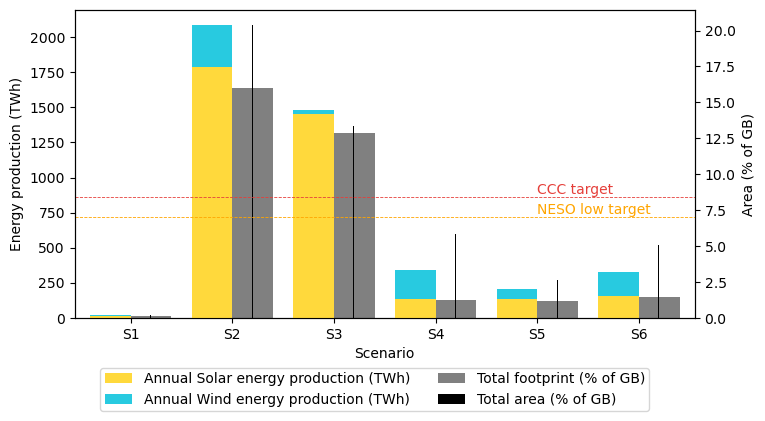

In [9]:
# Stacked bar plot
# Select rows to plot
rows = []
for i in range(1,int(len(ener_df)/2)+1):
    rows.append(f'S{i} thr')
# Small bars parameters
small_bars_width = 0.01
small_bars_spacing = 0.25
small_bars_N = 1
# New labels
new_labels = ['S1','S2','S3','S4','S5','S6']

# Energy Parameters to plot on the stacked left axis
ener_plot = ['Total Solar Production, co-location (TWh) (PVOUT)', 'Total Wind Production, co-location (TWh)']

# Plot
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
# Left Y bars
ener_df.loc[rows, ener_plot].plot.bar(ax=ax1, width=0.4, position = 1, stacked=True, color = ['#ffd93c','#28cae0'], legend=False)
# Right Y bars
ener_df.loc[rows,'Total footprint (% of GB) co-location (Denholm footprint)'].plot.bar(ax=ax, width=0.4, position = 0, color = 'grey')
# Right Y thin bars
ener_df.loc[rows,'Total area (% of GB)'].plot.bar(ax=ax, width=0.01, position = -19, color = 'black')
    
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.axhline(y=864, color = '#e53f3a', linewidth = 0.6, linestyle = '--') # Add target info
ax1.text(x=4, y=864 +20, color = '#e53f3a', s='CCC target', fontsize = 10)
ax1.axhline(y=719, color = 'orange', linewidth = 0.6, linestyle = '--') # Add target info
ax1.text(x=4, y=719 +20, color = 'orange', s='NESO low target',  fontsize = 10)
# Get labels to be able to order manually in legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
handles = handles2 + handles1
labels = ['Annual Solar energy production (TWh)', 'Annual Wind energy production (TWh)'] + ['Total footprint (% of GB)', 'Total area (% of GB)']
fig.legend(handles, labels, loc='lower center', borderpad=0.3, ncol=2, bbox_to_anchor=(0.5, -0.14))
# Axes labels
ax1.set_ylabel(f'Energy production (TWh)')
ax.set_ylabel('Area (% of GB)')
ax.set_xlim(left=-0.55, right = 5.55)
# Rename xticks
ax.set_xticks(range(len(new_labels)), new_labels)

# Save
plt.savefig(f'{workFiles_path}media/charts/Energy output combo.png',dpi=300, bbox_inches='tight')

plt.show()

# Land stats charts

## Combo area + footprint in one chart

In [27]:
# Test Prep summary df (renaming scenarii)
# Used to check df cause too many columns for Excel reading
agri_df = pd.read_excel(f'{output_path}stats/Comparison Agri stats.xlsx')
agri_df = agri_df.set_index('Unnamed: 0')
agri_df = agri_df.loc[:, ~(agri_df.columns.str.contains('S4')|agri_df.columns.str.contains('S2'))]
agri_df.columns = agri_df.columns.str.replace('S8','S2').str.replace('S5','S4').str.replace('S6','S5').str.replace('S7','S6')
agri_df.loc[:,(agri_df.columns.str.contains('thr_Total footprint'))]

,S1_thr_Total footprint (km²),S1_thr_Total footprint (% of category area),S3_thr_Total footprint (km²),S3_thr_Total footprint (% of category area),S4_thr_Total footprint (km²),S4_thr_Total footprint (% of category area),S5_thr_Total footprint (km²),S5_thr_Total footprint (% of category area),S6_thr_Total footprint (km²),S6_thr_Total footprint (% of category area),S2_thr_Total footprint (km²),S2_thr_Total footprint (% of category area)
Unnamed: 0,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC 3,NaN,NaN,22131.606812,27.517557,107.855647,0.134103,NaN,NaN,95.991784,0.119352,26256.454579,32.646228
ALC 4,233.362301,0.751810,4828.571073,15.555935,1995.429529,6.428563,1991.520974,6.415971,2303.801952,7.422029,6278.512439,20.227129
ALC 5,51.403238,0.072737,1769.122704,2.503373,302.789261,0.428458,277.098303,0.392104,408.616750,0.578208,3198.031679,4.525331


In [18]:
# Test Prep summary df (renaming scenarii)
# Used to check df cause too many columns for Excel reading
agri_df = pd.read_excel(f'{output_path}stats/Comparison PAs stats.xlsx')
agri_df = agri_df.set_index('Unnamed: 0')
agri_df = agri_df.loc[:, ~(agri_df.columns.str.contains('S4')|agri_df.columns.str.contains('S2'))]
agri_df.columns = agri_df.columns.str.replace('S8','S2').str.replace('S5','S4').str.replace('S6','S5').str.replace('S7','S6')
agri_df.loc[:,agri_df.columns.str.contains('thr_Total footprint')]

,S1_thr_Total footprint (km²),S1_thr_Total footprint (% of category area),S3_thr_Total footprint (km²),S3_thr_Total footprint (% of category area),S4_thr_Total footprint (km²),S4_thr_Total footprint (% of category area),S5_thr_Total footprint (km²),S5_thr_Total footprint (% of category area),S6_thr_Total footprint (km²),S6_thr_Total footprint (% of category area),S2_thr_Total footprint (km²),S2_thr_Total footprint (% of category area)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.278157,0.001722,15.197585,0.094072,NaN,NaN,NaN,NaN,2626.37114,16.257085


In [19]:
# Test Prep summary df (renaming scenarii)
# Used to check df cause too many columns for Excel reading
agri_df = pd.read_excel(f'{output_path}stats/Comparison Peat stats.xlsx')
agri_df = agri_df.set_index('Unnamed: 0')
agri_df = agri_df.loc[:, ~(agri_df.columns.str.contains('S4')|agri_df.columns.str.contains('S2'))]
agri_df.columns = agri_df.columns.str.replace('S8','S2').str.replace('S5','S4').str.replace('S6','S5').str.replace('S7','S6')
agri_df.loc[:,agri_df.columns.str.contains('thr_Total footprint')]

,S1_thr_Total footprint (km²),S1_thr_Total footprint (% of category area),S3_thr_Total footprint (km²),S3_thr_Total footprint (% of category area),S4_thr_Total footprint (km²),S4_thr_Total footprint (% of category area),S5_thr_Total footprint (km²),S5_thr_Total footprint (% of category area),S6_thr_Total footprint (km²),S6_thr_Total footprint (% of category area),S2_thr_Total footprint (km²),S2_thr_Total footprint (% of category area)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.989491,0.351203
2,NaN,NaN,433.191325,2.74267,25.550185,0.161766,NaN,NaN,NaN,NaN,795.499662,5.036558


In [10]:
# Function to drop abandonned scenarii and rename columns
def cleanup_scenarii(stats_df):
    stats_df = stats_df.loc[:, ~(stats_df.columns.str.contains('S4')|stats_df.columns.str.contains('S2'))]
    stats_df.columns = stats_df.columns.str.replace('S8','S2').str.replace('S5','S4').str.replace('S6','S5').str.replace('S7','S6')
    return stats_df

In [11]:
### Plot COMBO stats ###
# Requires cat = string for name of category, to find in Comparison {cat} stats.xlsx
# catnm = name of class to display in left Y axis
# nbr_scenarii = number of scenarii
# and color = list of colors for bars
def plot_combo_stats(cat, catnm, nbr_scenarii, color, width1, small_bars_width, small_bars_spacing, small_bars_N, small_bars_color):
    # New labels
    new_labels = ['S1','S2','S3','S4','S5','S6']
    # Select stats df
    stats_df = pd.read_excel(f'{output_path}stats/Comparison {cat} stats.xlsx')
    stats_df = cleanup_scenarii(stats_df)
    stats_dfT = stats_df.set_index('Unnamed: 0')
    stats_dfT = stats_dfT.T # transpose for plotting
    stats_dfT.drop(columns=0, inplace=True) # drop the pesky 0 column that gets created when writing to Excel
    # Select columns to plot
    cols_leftY = []
    for i in range(1,nbr_scenarii+1):
        cols_leftY.append(f'S{i}_thr_Total footprint (% of category area)')
    cols_leftY1 = []
    for i in range(1,nbr_scenarii+1):
        cols_leftY1.append(f'S{i}_thr_Total Area (% of category area)')
    cols_rightY = []
    for i in range(1,nbr_scenarii+1):
        cols_rightY.append(f'S{i} thr')
    
    ###### Plot ######
    fig,ax=plt.subplots(figsize=(8,4))
    ax1 = ax.twinx()
    ### Left Y normal bars ###
    stats_dfT.loc[cols_leftY].plot.bar(ax=ax1, width=width1, color = color)
    ### Left Y thin bars ###
    # Code to space out bars from 
    # https://stackoverflow.com/questions/66913686/how-to-get-spacing-between-grouped-bar-plot
    ind = np.arange(nbr_scenarii) # index / x-axis value # number here is number of bar groups
    width = small_bars_width # width of each bar
    DistBetweenBars = small_bars_spacing # distance between bars
    Num = small_bars_N # number of bars in a group
    # calculate the width of the grouped bars (including the distance between the individual bars)
    WithGroupedBars = Num*width + (Num-1)*DistBetweenBars
    data = stats_dfT.loc[cols_leftY1]
    for i,j in zip(range(Num), data):
        ax1.bar(ind-WithGroupedBars/2 + (width+DistBetweenBars)*i,data[j], width, color = small_bars_color)
    ### Right Y bars ###
    # Adding energy on second axis
    ener_df.loc[cols_rightY,'Total Production, co-location (TWh)'].plot.bar(ax=ax, width=0.9, edgecolor = 'lightgrey', zorder=0.5, facecolor='#eeeeee')
    ### Adjust display ###
    plt.legend( loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.3))
    ax1.yaxis.tick_left() # moving y axis to opposite side
    ax1.yaxis.set_label_position('left') # moving y axis to opposite side
    ax.yaxis.tick_right() # moving y axis to opposite side
    ax.yaxis.set_label_position('right') # moving y axis to opposite side
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
    ax1.set_ylabel(f'% of {catnm} class')
    ax.set_ylabel('Energy output (TWh)')
    # Rename xticks
    ax.set_xticks(range(len(new_labels)), new_labels)
    ### Save to file ###
    plt.savefig(f'{workFiles_path}media/charts/{cat} combo stats.png',dpi=300, bbox_inches='tight')
    
    plt.show()

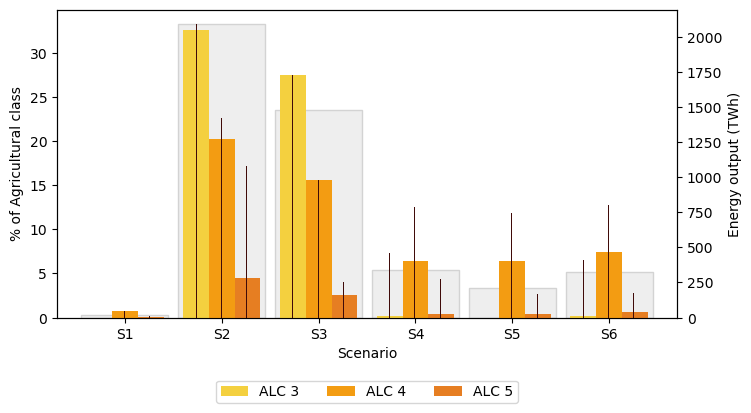

In [12]:
# Agri
plot_combo_stats('Agri', 'Agricultural', 6, ['#f4d03f','#f39c12','#e67e22'],0.8, 0.01, 0.25, 3, '#400b09')

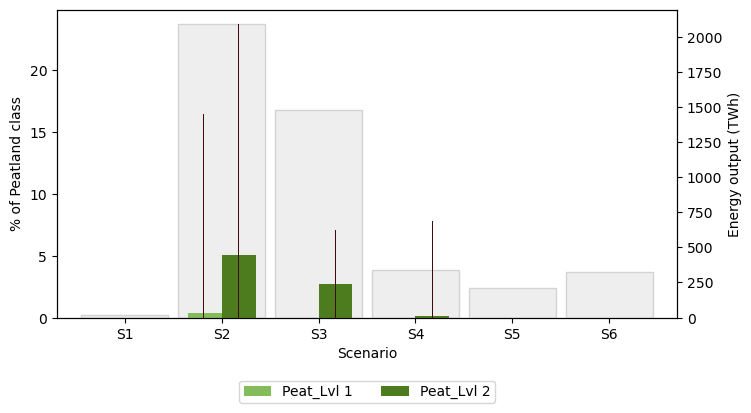

In [13]:
# Peat
plot_combo_stats('Peat','Peatland',6, ['#84bb5b','#4d7c1e'],0.7, 0.01, 0.35, 2, '#400b09')

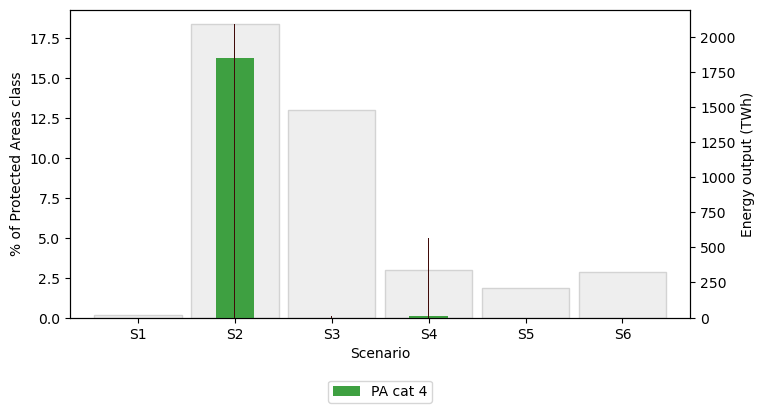

In [14]:
# PAs
plot_combo_stats('PAs','Protected Areas',6, ['#3ea041','#026b05'],0.4, 0.01, 0.35, 1, '#400b09')

# Various

## Raster histograms

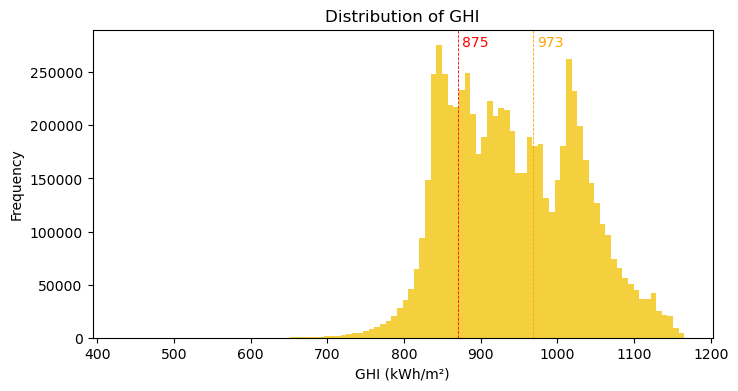

In [31]:
from rasterio.plot import show_hist
raster_path = f'{rawDat_path}Solar tech layers/United-Kingdom_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF/GHI.tif'
with rio.open(raster_path) as src:
    raster =  src.read(1)
    fig, ax = plt.subplots(figsize = (8,4))
    ax.hist(raster.flatten(), bins = 100, color = '#f4d03f')
    ax.set(title="Distribution of GHI", xlabel='GHI (kWh/m²)',ylabel='Frequency')
    ax.vlines(x=875-5, color = 'red', linestyles= '--', linewidth = 0.6, ymin=0, ymax=290000)
    ax.text(x=875, y=274000, color = 'red', s='875',  fontsize = 10)
    ax.vlines(x=973-5, color = 'orange', linestyles= '--', linewidth = 0.6, ymin=0, ymax=290000)
    ax.text(x=973, y=274000, color = 'orange', s='973',  fontsize = 10)
    ax.set_ylim(top=290000)
    
    plt.savefig(f'{workFiles_path}media/charts/GHI hist',dpi=300, bbox_inches='tight')
    plt.show()